# MLR model for the prediction of demand for shared bikes

**Data Description:** The Data contains the count of total rental bikes including both casual and registered in the years 2018 and 2019. Along with the date & time, weekday/working day/holiday data; and climatic data are provided.

**Business Goal**:

Model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

The model should be built taking this 'cnt' as the target variable

    Which variables are significant in predicting the demand for shared bikes.
    How well those variables describe the bike demands


**1. Understanding the Data and Sanity Check**

**2: Visualising the Data**

**3: Preparing the Data for Modelling**

**4: Training & Test Data Split**

**5: Building a Manual linear model**
- Check the Linear model with one variable
- Add one more variable and check the model
- Add all the varaibles and check the model

**6: Building model using RFE**

**7: Residual Analysis of the train data**

**8: Making the Prediction**

**9:  Model Evaluation**
- Q-Q Plot
- Residue Plot
- RMSE
- R2 - The coefficient of determination

**Inference & Conclusion**


*****************

In [1]:
#Importing the needed Liberaries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns #visualization
import scipy as sp
import statsmodels.tsa.api as smt
import statsmodels.api as sm

import matplotlib.pyplot as plt #visualization
import warnings
warnings.filterwarnings("ignore") #Suppress the Future Warnings for a cleaner representation 
import plotly.offline as py#visualization
import plotly.graph_objs as go#visualization

## Step 1. Understanding the Data and Sanity Check

   - Import/Load the Data
   - Data info
   - Columns and thier data types
   - Numeric vs Categorical Columns
   - Sanity check

In [2]:
#Import/Load the Data
bikes = pd.read_csv("day.csv")
#Limiting the floating point variables to 2 decimal places
pd.set_option('display.float_format', lambda x: '%.2f' % x)
#A quick look into the data
bikes.head(3).append(bikes.tail(3))

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.11,18.18,80.58,10.75,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.90,17.69,69.61,16.65,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.05,9.47,43.73,16.64,120,1229,1349
727,728,29-12-2019,1,1,12,0,6,0,2,10.39,12.12,75.29,8.33,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.49,11.59,48.33,23.50,364,1432,1796
729,730,31-12-2019,1,1,12,0,1,1,2,8.85,11.17,57.75,10.37,439,2290,2729


In [3]:
print (bikes.info());
print (bikes.shape);

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB
None
(730, 16)


In [4]:
# columns with missing data
bikes.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [5]:
bikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00
mean,365.50,2.50,0.50,6.53,0.03,3.00,0.68,1.39,20.32,23.73,62.77,12.76,849.25,3658.76,4508.01
std,210.88,1.11,0.50,3.45,0.17,2.01,0.47,0.54,7.51,8.15,14.24,5.20,686.48,1559.76,1936.01
min,1.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,2.42,3.95,0.00,1.50,2.00,20.00,22.00
25%,183.25,2.00,0.00,4.00,0.00,1.00,0.00,1.00,13.81,16.89,52.00,9.04,316.25,2502.25,3169.75
50%,365.50,3.00,0.50,7.00,0.00,3.00,1.00,1.00,20.47,24.37,62.62,12.13,717.00,3664.50,4548.50
75%,547.75,3.00,1.00,10.00,0.00,5.00,1.00,2.00,26.88,30.45,72.99,15.63,1096.50,4783.25,5966.00
max,730.00,4.00,1.00,12.00,1.00,6.00,1.00,3.00,35.33,42.04,97.25,34.00,3410.00,6946.00,8714.00


#### Insights:

#### No missing values and all variables are numerical

#### All the variables are numerical and the data dictionary explains categorical values 'weathersit' and 'season'


2. Data Quality & Fix
    - delete irrelevant features
    - type cast numerical to categorical
    - Handling outliers

#### Dropping Columns that are not relevant for the Analysis & Prediction

In [6]:
bikes.instant.value_counts()

1      1
480    1
482    1
483    1
484    1
      ..
246    1
247    1
248    1
249    1
730    1
Name: instant, Length: 730, dtype: int64

Column `instant` is only the index and will not help in prediction and shall be dropped
The `cnt` variable indicates the total number of bike rentals, including both `casual` and `registered`. 

In [7]:
#Dropping the columns that are not needed for the analysis
bikes = bikes.drop(['instant'],axis=1)
bikes = bikes.drop(['registered'],axis=1)
bikes = bikes.drop(['casual'],axis=1)

In [8]:
#Dropping Redundant Column `dteday`
bikes.drop(['dteday'], axis = 1, inplace = True)

In [9]:
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.11,18.18,80.58,10.75,985
1,1,0,1,0,0,0,2,14.90,17.69,69.61,16.65,801
2,1,0,1,0,1,1,1,8.05,9.47,43.73,16.64,1349
3,1,0,1,0,2,1,1,8.20,10.61,59.04,10.74,1562
4,1,0,1,0,3,1,1,9.31,11.46,43.70,12.52,1600


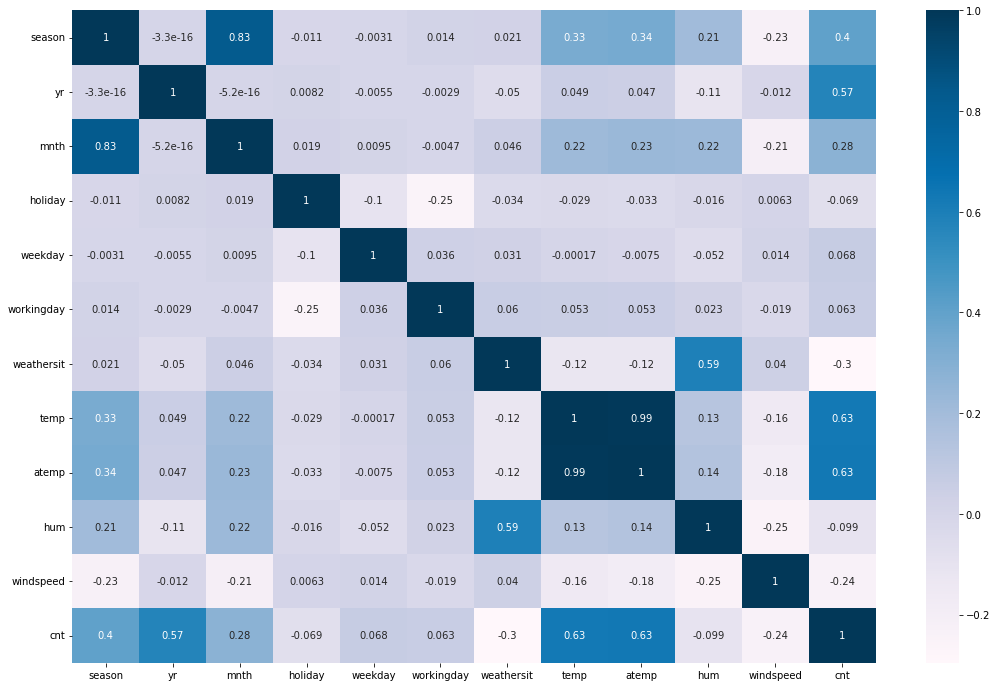

In [10]:
plt.figure(figsize=(18,12))
sns.heatmap(bikes.corr(), annot=True, cmap='PuBu')
plt.show()

#### Insights:
- `temp` and `atemp` variables are highly correlated and one of them can be dropped
- `season` and `mnth` variables are highly correlated and one of them can be dropped
- Since `atemp` is the feeling temperature which potentially can include humidity & windspeed, dropping `temp` 

In [11]:
#Dropping Highly correlated Columns `atemp` & `mnth`
bikes.drop(['temp'], axis = 1, inplace = True) #0.99 corrleated with `atemp`
bikes.drop(['mnth'], axis = 1, inplace = True) #0.83 corrleated with `season`

#### Check for Outliers

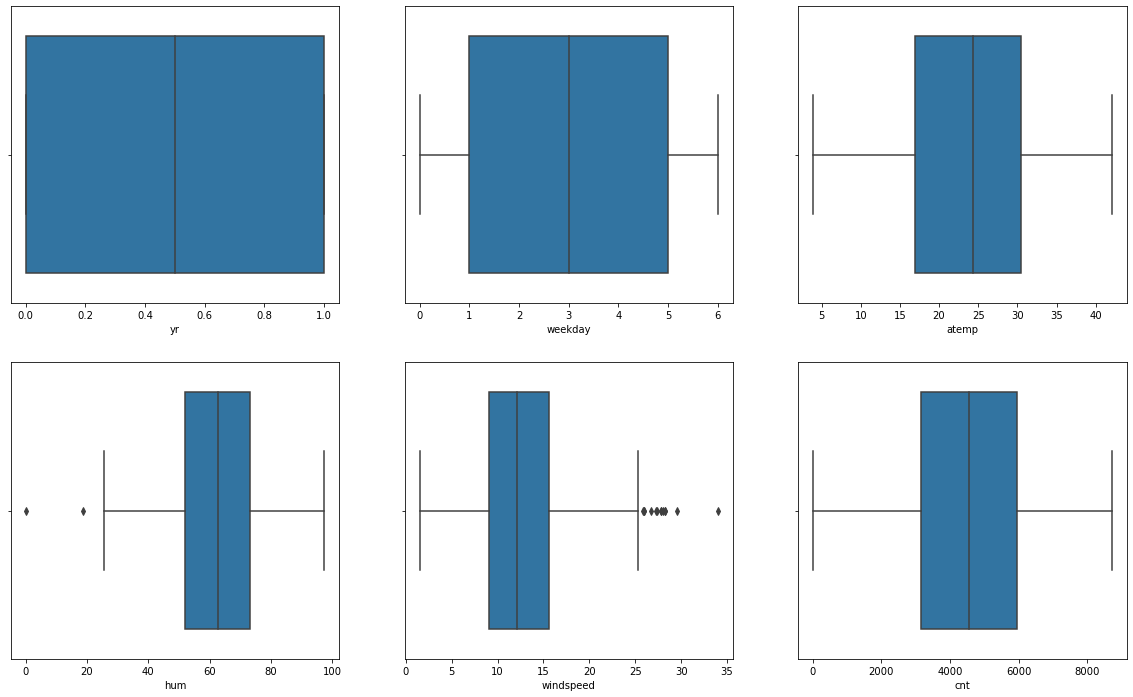

In [12]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(bikes.yr)
plt.subplot(2,3,2)
sns.boxplot(bikes.weekday)
plt.subplot(2,3,3)
sns.boxplot(bikes.atemp);
plt.subplot(2,3,4)
sns.boxplot(bikes.hum);
plt.subplot(2,3,5)
sns.boxplot(bikes.windspeed);
plt.subplot(2,3,6)
sns.boxplot(bikes.cnt);
plt.show()

#### Insights:
- Target variable has no outliers
- `hum` and `windspeed` has outliers and to be handled

### Treating the outliers

In [13]:
#IQR method to remove the outliers
print(bikes.shape)
Q1 = bikes.hum.quantile(0.25)
Q3 = bikes.hum.quantile(0.75)
IQR = Q3 - Q1
print("IQR: ", IQR)

# Remove Outliers
bikes = bikes[~((bikes.hum < (Q1 - 1.5 * IQR)) |(bikes.hum > (Q3 + 1.5 * IQR)))]
# Check shape again
print(bikes.shape)

(730, 10)
IQR:  20.989575000000002
(728, 10)


In [14]:
#IQR method to remove the outliers
print(bikes.shape)
Q1 = bikes.windspeed.quantile(0.25)
Q3 = bikes.windspeed.quantile(0.75)
IQR = Q3 - Q1
print("IQR: ", IQR)

# Remove Outliers
bikes = bikes[~((bikes.windspeed < (Q1 - 1.5 * IQR)) |(bikes.windspeed > (Q3 + 1.5 * IQR)))]
# Check shape again
print(bikes.shape)

(728, 10)
IQR:  6.593268999999999
(716, 10)


#### Visually check outliers again

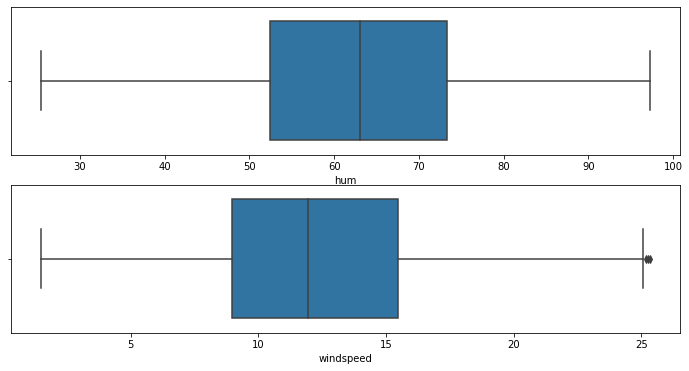

In [15]:
plt.figure(figsize=(12, 6))
plt.subplot(2,1,1)
sns.boxplot(bikes.hum);
plt.subplot(2,1,2)
sns.boxplot(bikes.windspeed);
plt.show()

## Step 2: Visualising the Data
`matplotlib` and `seaborn` used for visulaization of data

pairplot of all the numeric variables

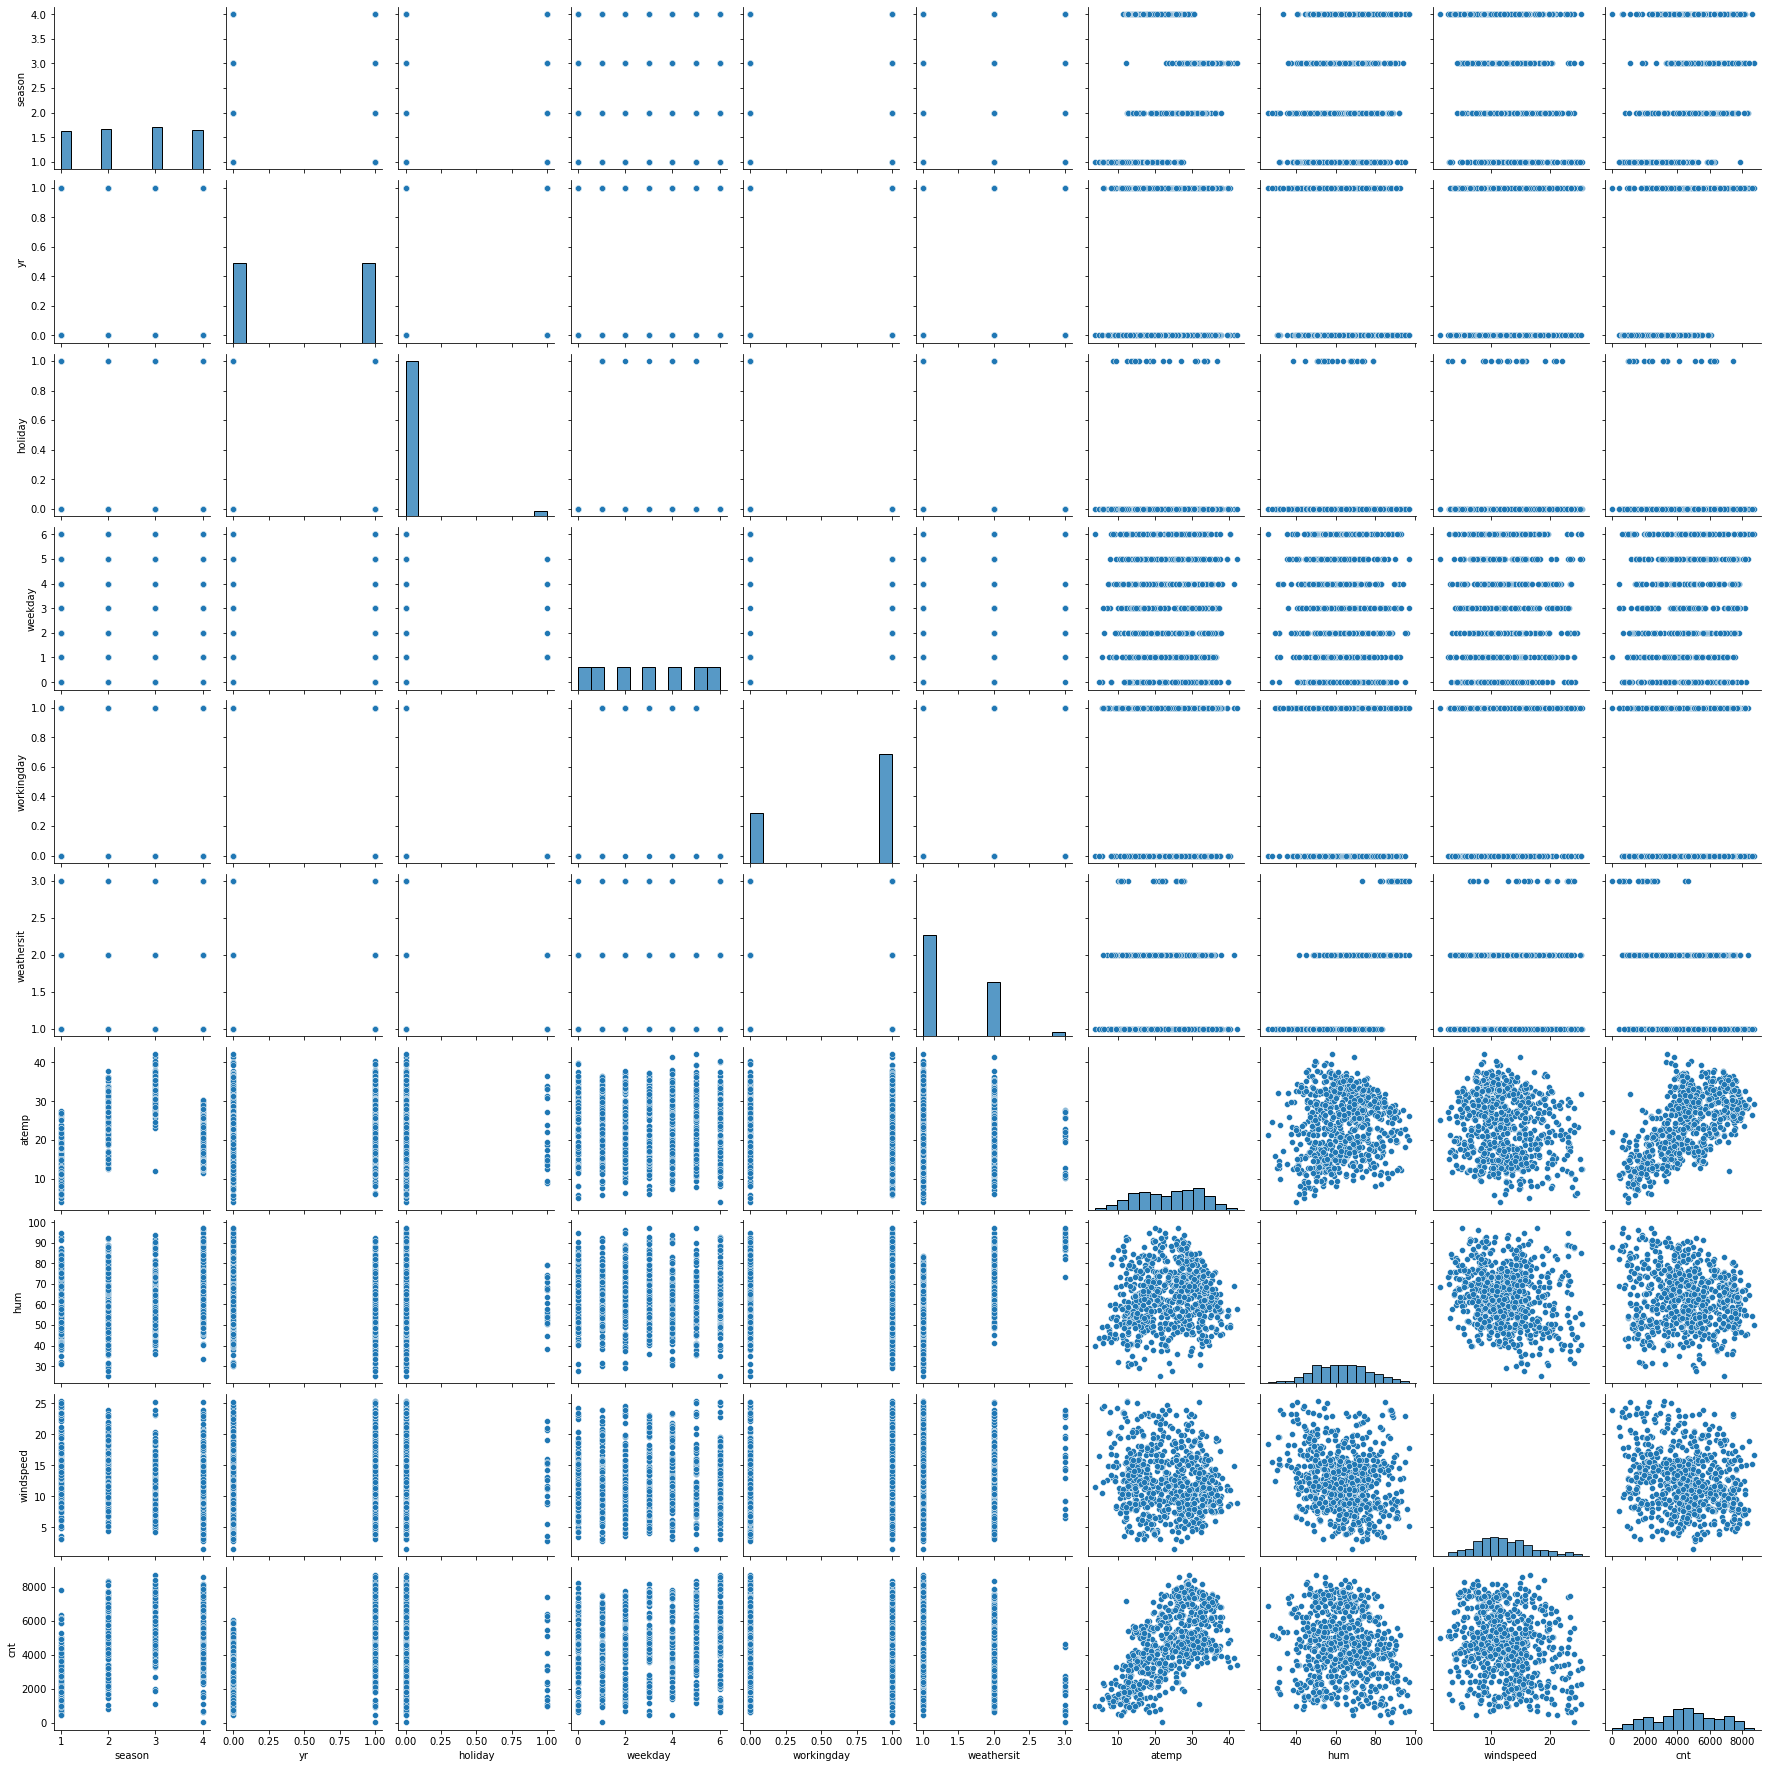

In [16]:
# Pairwise scatter plot
sns.pairplot(bikes);

#### Insights:
- Few variables seems to have relation with the target variable `atemp`, `yr`

### Visualize the below variables separately for better understanding
- `weathersit`, `season`, `yr` along with the atemp

##### weathersit: 1,2 means no possiblity for Snow/Rain; 3 and 4 means chaince of light or heavy Rain/Snow
    + weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
##### Season: (1:spring, 2:summer, 3:fall, 4:winter)

In [17]:
print ("weathersit: \n", bikes.weathersit.value_counts())
print ("season: \n", bikes.season.value_counts())
print ("Yr: \n", bikes.yr.value_counts())

weathersit: 
 1    453
2    243
3     20
Name: weathersit, dtype: int64
season: 
 3    188
2    181
4    176
1    171
Name: season, dtype: int64
Yr: 
 0    359
1    357
Name: yr, dtype: int64


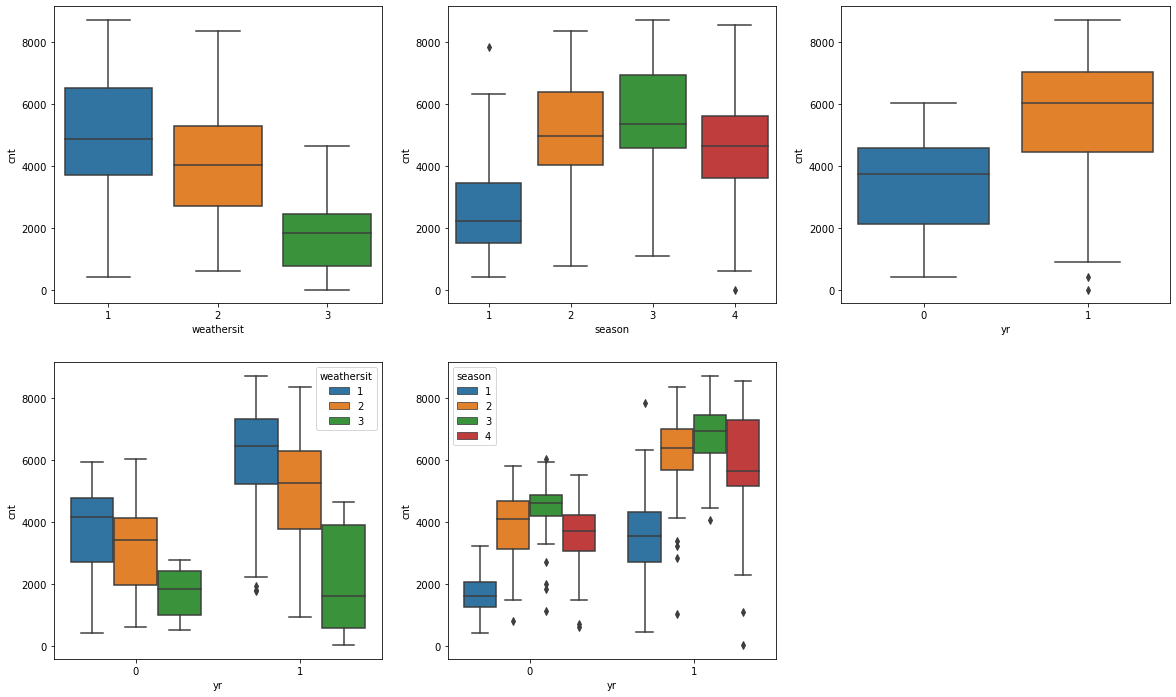

In [18]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = bikes.weathersit, y = bikes.cnt, data = bikes)
plt.subplot(2,3,2)
sns.boxplot(x = bikes.season, y = bikes.cnt, data = bikes)
plt.subplot(2,3,3)
sns.boxplot(x = bikes.yr, y = bikes.cnt, data = bikes)
plt.subplot(2,3,4)
sns.boxplot(y = bikes.cnt, x = bikes.yr, hue = bikes.weathersit);
plt.subplot(2,3,5)
sns.boxplot(y = bikes.cnt, x = bikes.yr, hue = bikes.season);
plt.show()

### Insights:
- year on year the bike sharing `cnt` is increasing
- season 1 'spring' has less hires in both the years
- In `weathersit` 3, the bike sharing `cnt` is less

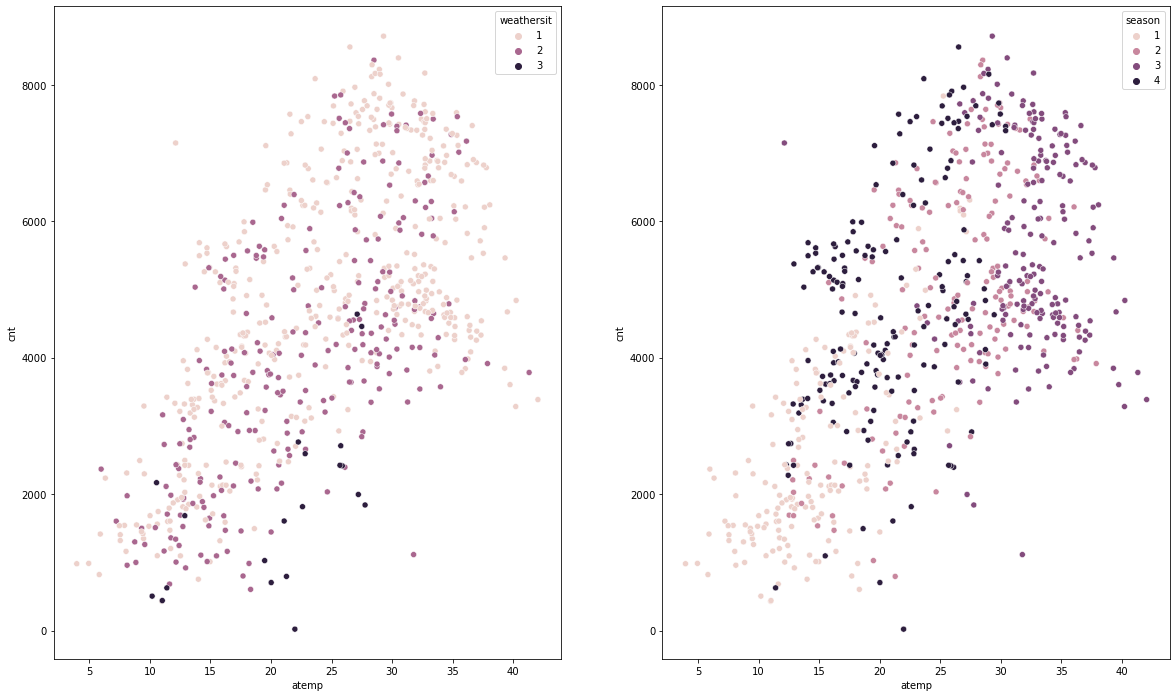

In [19]:
plt.figure(figsize=(20, 12))
plt.subplot(1,2,1)
sns.scatterplot(y = bikes.cnt, x = bikes.atemp, hue = bikes.weathersit);
plt.subplot(1,2,2)
sns.scatterplot(y = bikes.cnt, x = bikes.atemp, hue = bikes.season);

#### Insights:

- When the weather situtation is favourable, the bike hiring is higher
- Weather situation is dependant on the season, atemp

## Step 3: Preparing the Data for Modelling
* Encoding
    - Converting Yes/No to 1s & 0s
    - Dummy variables

In [20]:
bikes.head()

,season,yr,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,1,0,0,6,0,2,18.18,80.58,10.75,985
1,1,0,0,0,0,2,17.69,69.61,16.65,801
2,1,0,0,1,1,1,9.47,43.73,16.64,1349
3,1,0,0,2,1,1,10.61,59.04,10.74,1562
4,1,0,0,3,1,1,11.46,43.70,12.52,1600


### Dummy Variables
* In this case there are no Yes/No varaibles. Also the `yr` is already represented as 0 and 1
* `season` and `weathersit` can be converted to Dummy varibles
    - `season` has 4 levels
    - `weathersit` has 4 levels as per data disctionary, but only 3 levels data is available

##### Season: (1:spring, 2:summer, 3:fall, 4:winter)
- season 1 'spring' has less hires in both the years. So considering the spring season as `off-season` and other seasons as normal seasons

In [21]:
bikes["season_type"] = bikes.season.replace({1: 'off_season', 2: 'normal_season', 3: 'normal_season', 4 : 'normal_season'})

##### weathersit: 1,2 means no possiblity for Snow/Rain; 3 and 4 means chaince of light or heavy Rain/Snow
    + weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
In weathersit 3 and 4, the likelyhood of Rain or Snow is present, which affects the bike sharing. Deriving `rain_snow_prob` from the `weathersit`

In [22]:
# Probability of Rain/Snow
bikes['rain_snow_prob'] = bikes.weathersit > 2
bikes.rain_snow_prob = bikes.rain_snow_prob.replace({True: 1, False: 0})
bikes.rain_snow_prob.value_counts()

0    696
1     20
Name: rain_snow_prob, dtype: int64

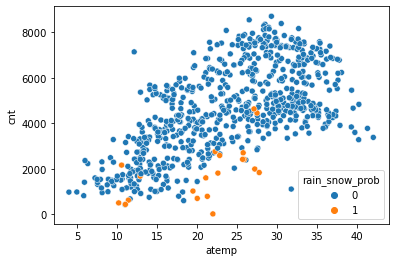

In [23]:
sns.scatterplot(y = bikes.cnt, x = bikes.atemp, hue = bikes.rain_snow_prob);

#### Insights:

- Even if the atemp is higher, if the weather situation is likely to rain/snow, the hiring count `cnt` is less

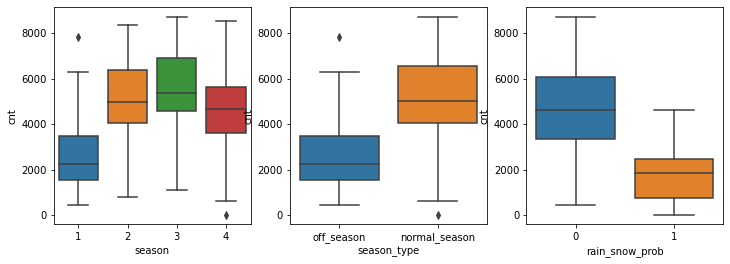

In [24]:
plt.figure(figsize=(12, 4))
plt.subplot(1,3,1)
sns.boxplot(y = bikes.cnt, x = bikes.season);
plt.subplot(1,3,2)
sns.boxplot(y = bikes.cnt, x = bikes.season_type);
plt.subplot(1,3,3)
sns.boxplot(y = bikes.cnt, x = bikes.rain_snow_prob);
plt.show()

In [25]:
# Get the dummy variables for the derived feature 'season_type' and store it in a new variable - 'Sea_Stat'
Sea_Stat = pd.get_dummies(bikes.season_type)
#Print and check the dummiesprint (Sea_Stat.value_counts())

- `10` normal_season
- `01` off_season

In [26]:
# Dropping the first column `normal_season`
Sea_Stat = pd.get_dummies(bikes.season_type, drop_first = True)
#Print and check the dummies
print (Sea_Stat.value_counts())

off_season
0             545
1             171
dtype: int64


- `10` normal_season is now `0`
- `01` off_season is now `1`

In [27]:
#Concating the season_type status to the bikes dataframe
bikes = pd.concat([bikes, Sea_Stat], axis = 1)

In [28]:
bikes.head()

,season,yr,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt,season_type,rain_snow_prob,off_season
0,1,0,0,6,0,2,18.18,80.58,10.75,985,off_season,0,1
1,1,0,0,0,0,2,17.69,69.61,16.65,801,off_season,0,1
2,1,0,0,1,1,1,9.47,43.73,16.64,1349,off_season,0,1
3,1,0,0,2,1,1,10.61,59.04,10.74,1562,off_season,0,1
4,1,0,0,3,1,1,11.46,43.70,12.52,1600,off_season,0,1


In [29]:
#Dropping redundant variables as they are replaced with Dummy variables or derived
bikes.drop(['season'], axis = 1, inplace = True)
bikes.drop(['weathersit'], axis = 1, inplace = True)
bikes.drop(['season_type'], axis = 1, inplace = True)

In [30]:
bikes.head()

,yr,holiday,weekday,workingday,atemp,hum,windspeed,cnt,rain_snow_prob,off_season
0,0,0,6,0,18.18,80.58,10.75,985,0,1
1,0,0,0,0,17.69,69.61,16.65,801,0,1
2,0,0,1,1,9.47,43.73,16.64,1349,0,1
3,0,0,2,1,10.61,59.04,10.74,1562,0,1
4,0,0,3,1,11.46,43.70,12.52,1600,0,1


In [31]:
bikes.describe()

,yr,holiday,weekday,workingday,atemp,hum,windspeed,cnt,rain_snow_prob,off_season
count,716.00,716.00,716.00,716.00,716.00,716.00,716.00,716.00,716.00,716.00
mean,0.50,0.03,3.00,0.68,23.82,63.13,12.48,4536.61,0.03,0.24
std,0.50,0.17,2.00,0.47,8.16,13.92,4.81,1932.26,0.16,0.43
min,0.00,0.00,0.00,0.00,3.95,25.42,1.50,22.00,0.00,0.00
25%,0.00,0.00,1.00,0.00,16.89,52.46,8.99,3214.00,0.00,0.00
50%,0.00,0.00,3.00,1.00,24.61,63.08,11.96,4572.50,0.00,0.00
75%,1.00,0.00,5.00,1.00,30.56,73.26,15.46,6031.75,0.00,0.00
max,1.00,1.00,6.00,1.00,42.04,97.25,25.33,8714.00,1.00,1.00


## Step 4: Training & Test Data Split

In [32]:
from sklearn.model_selection import train_test_split

# To specify that the train and test data set always have the same rows, respectively
np.random.seed(0)
bikes_train, bikes_test = train_test_split(bikes, train_size = 0.7, test_size = 0.3, random_state = 100)

In [33]:
print ("Train:", bikes_train.shape)
print ("\nTest:", bikes_test.shape)

Train: (501, 10)

Test: (215, 10)


### Rescaling the Features 

Colums `atemp`, `hum`, `windspeed`, `weekday` are bigger float/integer values. 

So need to scale the predictor variables to bring them to a comparable scale. 
- Min-Max scaling will be used on this dataset

In [34]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [35]:
# Apply scaler() to all the needed predictor varibales and the target variable
num_vars = ['atemp', 'hum', 'windspeed', 'weekday', 'cnt']

bikes_train[num_vars] = scaler.fit_transform(bikes_train[num_vars])

In [36]:
bikes_train.describe()

,yr,holiday,weekday,workingday,atemp,hum,windspeed,cnt,rain_snow_prob,off_season
count,501.00,501.00,501.00,501.00,501.00,501.00,501.00,501.00,501.00,501.00
mean,0.50,0.03,0.50,0.68,0.52,0.52,0.46,0.52,0.02,0.24
std,0.50,0.18,0.34,0.47,0.22,0.21,0.21,0.23,0.15,0.43
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.17,0.00,0.33,0.36,0.32,0.36,0.00,0.00
50%,1.00,0.00,0.50,1.00,0.54,0.52,0.43,0.52,0.00,0.00
75%,1.00,0.00,0.83,1.00,0.71,0.67,0.59,0.69,0.00,0.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


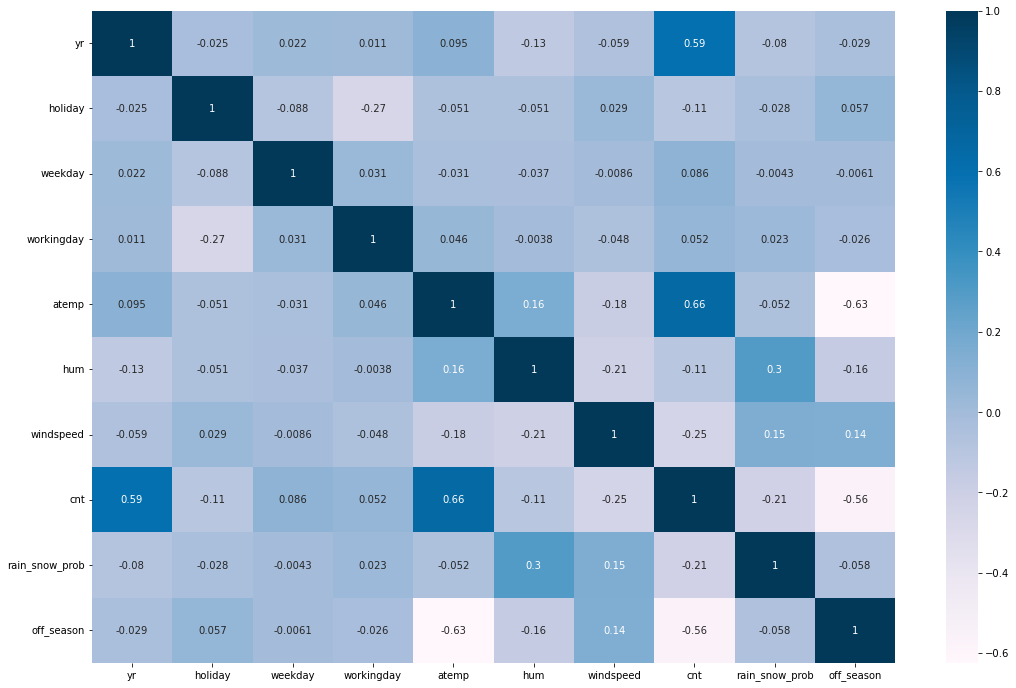

In [37]:
plt.figure(figsize=(18,12))
sns.heatmap(bikes_train.corr(), annot=True, cmap='PuBu')
plt.show()

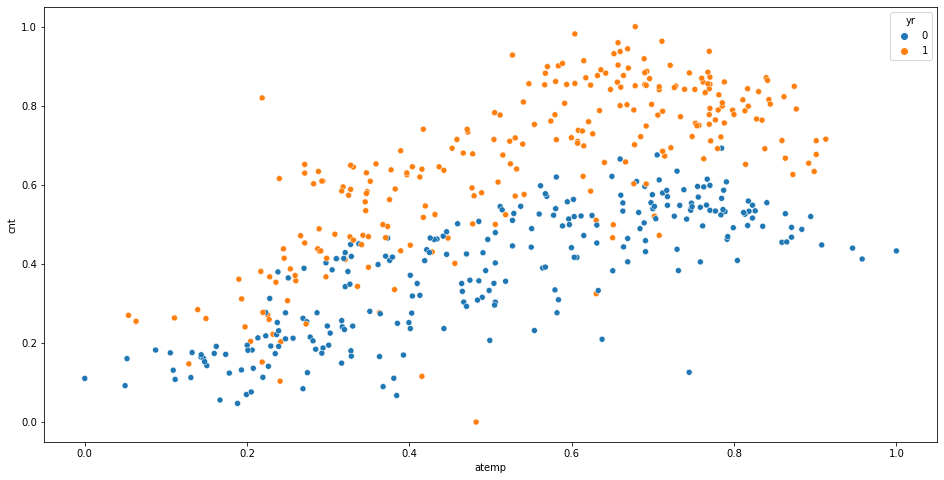

In [38]:
plt.figure(figsize=(16, 8))
sns.scatterplot(y = bikes_train.cnt, x = bikes_train.atemp, hue = bikes_train.yr);
plt.show()

### Insights:
- `yr` and `atemp` seems highly correlated with the hiring `cnt`

### Dividing into X and Y sets for the model building

In [39]:
bikes_train_m = bikes_train.copy() #Create a copy of the training data for Manual model as '_m'
y_train = bikes_train_m.pop('cnt')
X_train = bikes_train_m

In [40]:
X_train.head()

,yr,holiday,weekday,workingday,atemp,hum,windspeed,rain_snow_prob,off_season
728,1,0,0.00,0,0.20,0.29,0.92,0,1
541,1,0,0.33,1,0.69,0.13,0.91,0,0
116,0,0,0.50,1,0.66,0.83,0.81,0,0
718,1,0,0.67,1,0.34,0.57,0.31,0,0
496,1,0,1.00,0,0.62,0.29,0.28,0,0


## Step 5: Building a Manual linear model

In [41]:
import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_train[['atemp']])

# Creating first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [42]:
# Check the parameters obtained
lr.params

const   0.16
atemp   0.68
dtype: float64

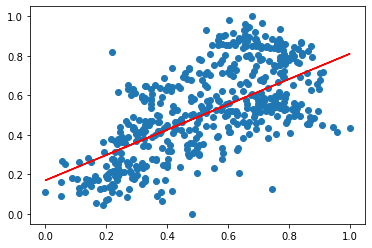

In [43]:
# Scatter plot and the fitted regression line
plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1], 0.17 + 0.64*X_train_lm.iloc[:, 1], 'r')
plt.show()

In [44]:
# Summary of the linear regression model above
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.432
Model:                            OLS   Adj. R-squared:                  0.431
Method:                 Least Squares   F-statistic:                     379.9
Date:                Wed, 14 Sep 2022   Prob (F-statistic):           2.46e-63
Time:                        13:17:52   Log-Likelihood:                 175.96
No. Observations:                 501   AIC:                            -347.9
Df Residuals:                     499   BIC:                            -339.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1624      0.020      8.183      0.0

### Insights:
- With only the `atemp` variable the R-Suareed is less and can be improved if more variables are added
- the coef of `atemp` seems good

### Adding more variable
- `yr` added. 

In [45]:
X_train_lm = X_train[['yr', 'atemp']]

In [46]:
# Build a linear model
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const   0.07
yr      0.24
atemp   0.63
dtype: float64

In [47]:
# Check the summary
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     630.5
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          3.45e-137
Time:                        13:17:52   Log-Likelihood:                 350.25
No. Observations:                 501   AIC:                            -694.5
Df Residuals:                     498   BIC:                            -681.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0678      0.015      4.625      0.0

### Insights:
- Adding `yr` to the `atemp` increased the R-Square value`
- The Adjusted R-Square value is also increased

### Adding all the variables to the model

In [48]:
X_train.head()

,yr,holiday,weekday,workingday,atemp,hum,windspeed,rain_snow_prob,off_season
728,1,0,0.00,0,0.20,0.29,0.92,0,1
541,1,0,0.33,1,0.69,0.13,0.91,0,0
116,0,0,0.50,1,0.66,0.83,0.81,0,0
718,1,0,0.67,1,0.34,0.57,0.31,0,0
496,1,0,1.00,0,0.62,0.29,0.28,0,0


In [49]:
#Build a linear model
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)
lr_1 = sm.OLS(y_train, X_train_lm).fit()

lr_1.params

const             0.33
yr                0.23
holiday          -0.07
weekday           0.05
workingday       -0.00
atemp             0.44
hum              -0.16
windspeed        -0.13
rain_snow_prob   -0.16
off_season       -0.16
dtype: float64

In [50]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     255.0
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          8.54e-179
Time:                        13:17:52   Log-Likelihood:                 469.01
No. Observations:                 501   AIC:                            -918.0
Df Residuals:                     491   BIC:                            -875.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3343      0.026     12.

### Insights:
`holiday` and `workingday` has higher P-values and can be dropped. Checking for the VIF before dropping them

### Checking VIF

In [51]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [52]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,atemp,8.01
5,hum,6.31
6,windspeed,4.68
3,workingday,3.15
2,weekday,2.94
0,yr,2.01
8,off_season,1.79
7,rain_snow_prob,1.18
1,holiday,1.10


### Insights:
- `atemp` and `hum` has very low P-value but higher VIF
- `workingday` has higher P-values and but relatively much lower VIF values

### With the insights from the manual model proceeding with RFE based model

## Step 6: Building model using RFE 
    - Recursive Feature Elimination Model
#### Above inference on `atemp`, `hum` and `workingday` shall be validated using Automatic model

In [53]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [54]:
bikes_train_a = bikes_train.copy() #Create a copy of the training data for Auto model as '_a'
y_train = bikes_train_a.pop('cnt')
X_train = bikes_train_a
y_train.head()

728   0.20
541   0.85
116   0.44
718   0.47
496   0.85
Name: cnt, dtype: float64

In [55]:
# Running RFE with the output number of the variable equal to 6
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, step = 6) # running RFE
rfe = rfe.fit(X_train, y_train)

In [56]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 2),
 ('weekday', False, 2),
 ('workingday', False, 2),
 ('atemp', True, 1),
 ('hum', False, 2),
 ('windspeed', False, 2),
 ('rain_snow_prob', True, 1),
 ('off_season', True, 1)]

In [57]:
#List the columns that are significant
rfe_col = X_train.columns[rfe.support_]
rfe_col

Index(['yr', 'atemp', 'rain_snow_prob', 'off_season'], dtype='object')

In [58]:
#List the columns that are of less significant
X_train.columns[~rfe.support_]

Index(['holiday', 'weekday', 'workingday', 'hum', 'windspeed'], dtype='object')

### Insights:
- `weekday`, `workingday` which was suggested to be dropped by manual is matching with the RFE for further analysis
- Will adding any of the `windspeed`, `rain_snow_prob` increase the model performance? To be validated

### Building model using statsmodel, for the detailed statistics

In [59]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[rfe_col]

In [60]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [61]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [62]:
#Summary of the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     468.7
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          6.44e-167
Time:                        13:17:53   Log-Likelihood:                 426.01
No. Observations:                 501   AIC:                            -842.0
Df Residuals:                     496   BIC:                            -820.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2197      0.018     12.

### Insights:
- the R-Squared value and Adjusted R-Squared value are good. But before finalizing the model VIF to be checked

### Checking VIF

In [63]:
X_train_rfe.columns

Index(['const', 'yr', 'atemp', 'rain_snow_prob', 'off_season'], dtype='object')

In [64]:
X_train_ref_1 = X_train_rfe.drop(["const"], axis = 1) 

In [65]:
vif = pd.DataFrame()
X = X_train_ref_1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,1.98
1,atemp,1.90
3,off_season,1.12
2,rain_snow_prob,1.02


### Insights:
- R-squared: `0.791` and Adj. R-squared: `0.789` seems good
- In previous runs, `hum` and `atemp` had high VIF
- VIF of all the predictor variables are well within 5 and shall be kept 

### Deleting and Adding variables one at a time to the model wasn't necessary

## Step 7: Residual Analysis of the train data

- To check if the error terms are also normally distributed 
- plot the histogram of the error terms and check the distribution

In [66]:
X_train_new = X_train_ref_1

In [67]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [68]:
y_train_cnt = lm.predict(X_train_lm)

Text(0.5, 0, 'Errors')

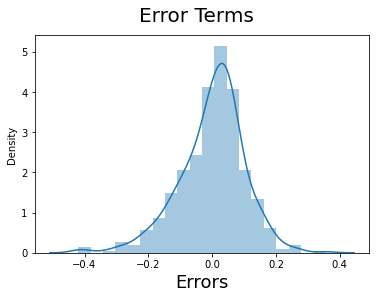

In [69]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

### Insights:
- the Error is normally distributed
- the mean is at `Zero`
- Not much skewed

## Step 8: Making the Prediction

In [70]:
# Applying the same scaler() to all the needed predictor variables and the target variable on the test data
num_vars = ['atemp', 'hum', 'windspeed', 'weekday', 'cnt']

bikes_test[num_vars] = scaler.fit_transform(bikes_test[num_vars])

In [71]:
bikes_test.describe()

,yr,holiday,weekday,workingday,atemp,hum,windspeed,cnt,rain_snow_prob,off_season
count,215.00,215.00,215.00,215.00,215.00,215.00,215.00,215.00,215.00,215.00
mean,0.48,0.02,0.51,0.69,0.53,0.52,0.47,0.52,0.04,0.23
std,0.50,0.15,0.33,0.46,0.22,0.20,0.22,0.24,0.19,0.42
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.33,0.00,0.35,0.37,0.29,0.36,0.00,0.00
50%,0.00,0.00,0.50,1.00,0.56,0.51,0.46,0.53,0.00,0.00
75%,1.00,0.00,0.83,1.00,0.70,0.66,0.61,0.69,0.00,0.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


### Dividing into X and Y sets on the test data

In [72]:
bikes_test_1 = bikes_test.copy()
y_test = bikes_test_1.pop('cnt')
X_test = bikes_test_1

In [73]:
X_test.shape

(215, 9)

In [74]:
# Using the model to make predictions

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [75]:
X_test_new.shape

(215, 5)

In [76]:
# Making predictions
y_pred = lm.predict(X_test_new)

## Step 9:  Model Evaluation

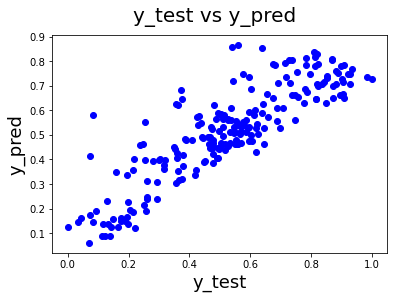

In [77]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred, color = "blue")
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=18)                          # Y-label
plt.show()

## Q-Q Plot

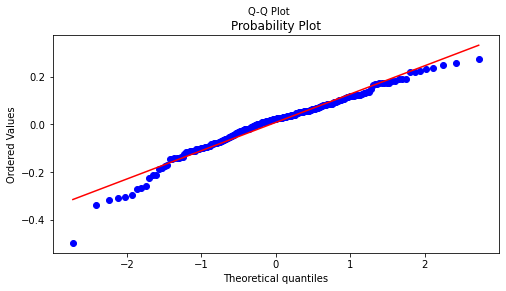

In [78]:
# Q-Q Plot on the residual
residual = y_test - y_pred
fig, ax = plt.subplots(figsize=(8,4))
fig.suptitle('Q-Q Plot', fontsize = 10) 
sp.stats.probplot(residual, plot=ax, fit=True);

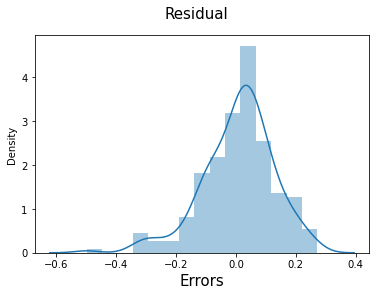

In [79]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_test - y_pred), bins = 15)
fig.suptitle('Residual', fontsize = 15)                  # Plot heading 
plt.xlabel('Errors', fontsize = 15);                         # X-label

### Insights:
- the Residue is normally distributed
- the mean is at `Zero`
- Not much skewed

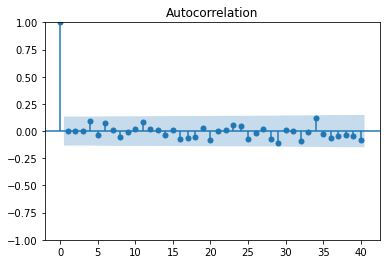

In [80]:
acf = smt.graphics.plot_acf(residual, lags=40 , alpha=0.05)
acf.show()

### Insights:
- the Residue has a constant variance without increasing or decreasing pattern

### RMSE

In [81]:
#RMSE value
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test, y_pred))

0.11984603013018852

 ## R2 - The coefficient of determination

In [82]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7411628625788911

# Inference & Conclusion

`yr`, `atemp`, `off_season`, `rain_snow_prob` variables were used in the model.

`yr` - Year variable used as it is from the data set

`atemp` - Feeling Temperature variable used as it is from the data set and scaled for the model and perdiction

`off_season` is derived from the `season` variable. 

`rain_snow_prob` is derived from the `weathersit` variable. 

The bike sharing `cnt` is dependent on the season, feeling temperature, yr and weather situation.
- Year on Year the bike sharing `cnt` is increasing. In 2020, the bike sharing `cnt` is expected to increase from 2019
- During off-season (spring season) the bike sharing `cnt` is relatively less. 
    * Suggestion: An off-season discount on bike sharing might increase the bike sharing `cnt` in spring season
- `atemp` the feeling temperature potentially includes the `humidity` and the `windspeed`. When the feeling temperature is favourable, the bike sharing `cnt` is increasing
- However, irrespective of the `atemp`, `yr` and `season`, if there is a possibility of Rain or Snow, the bike sharing `cnt` is reduced. When the `weathersit` shows a ckear sky or no Rain/Snow, the bike sharing `cnt` is increasing. 